In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

df = pd.read_csv('BINANCE_BTCUSDT, 1D (1).csv')
df['time'] = df['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
df['MoM_pct_change_close']= df['close'].pct_change(fill_method ='ffill')*100


df.drop(columns = ['open', 'high', 'low', 'Volume', 'GOLD, TVC: Open','GOLD, TVC: High' , 'GOLD, TVC: Low', 'Volume MA'], inplace=True)
# filter the time
filt = (df['time'] > '2022')

df[filt]

,time,close,"GOLD, TVC: Close",MoM_pct_change_close
1598,2022-01-01,47722.65,NaN,3.257940
1599,2022-01-02,47286.18,NaN,-0.914597
1600,2022-01-03,46446.10,1801.300,-1.776587
1601,2022-01-04,45832.01,1814.086,-1.322156
1602,2022-01-05,43451.13,1809.180,-5.194797
...,...,...,...,...
1900,2022-10-30,20627.48,NaN,-0.875506
1901,2022-10-31,20490.74,1632.770,-0.662902
1902,2022-11-01,20483.62,1648.180,-0.034747
1903,2022-11-02,20151.84,1635.298,-1.619733


Text(0, 0.5, 'Gold')

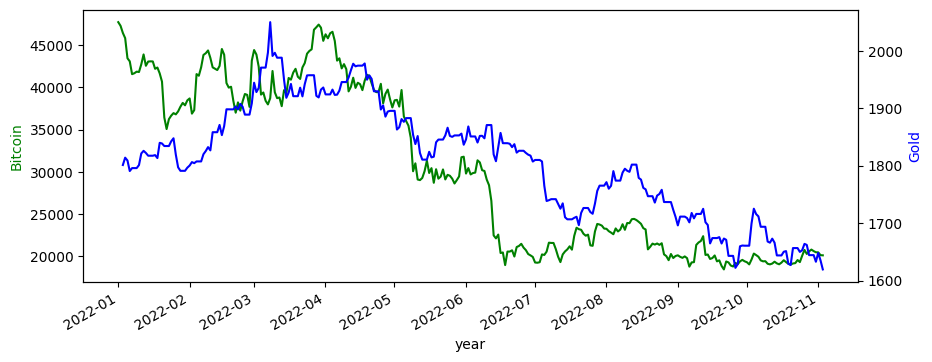

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date

# set timeframe as you whish
#filt = (df['time'] > '2022')
#df_tf = df[filt] 

#width = np.diff('time').min()
#ax.bar(time, align = 'center', width = width)
df = pd.read_csv('BINANCE_BTCUSDT, 1D (1).csv')
df['time'] = df['time'].apply(lambda x: datetime.fromtimestamp(x))

df = df[df['time'] > datetime.fromisoformat('2022-01-01')]
x = df['time']
y1 = df['close']
y2 = df['GOLD, TVC: Close'].ffill()

fig, ax1 = plt.subplots(figsize=(10,4))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')


ax1.set_xlabel('year')

ax1.xaxis_date()

#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
fig.autofmt_xdate()

ax1.set_ylabel('Bitcoin', color='g')
ax2.set_ylabel('Gold', color='b')

In [50]:
filt = (df['time'] > '2022')
df_tf = df[filt] 

df_tf['close'].corr(df['GOLD, TVC: Close'], method='pearson', min_periods=1)

0.7997063724183494